<a href="https://colab.research.google.com/github/alma-scheffer/Shoe_market_segmentation/blob/main/Market_segmentation_shoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset used: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [98]:
customers = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

# Data analysis

@ Higher spending score means that the customer spends more money.

@ In usual: the more data the better the modell. However if only 200 rows, it is important to think through the importance of each column, i.e. Age and Gender.

In [99]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [100]:
customers["Gender"].value_counts()
# No missing value

Female    112
Male       88
Name: Gender, dtype: int64

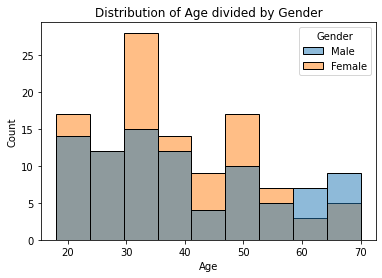

In [101]:
sns.histplot(x = customers["Age"], hue = customers["Gender"])
plt.title("Distribution of Age divided by Gender")
plt.show()

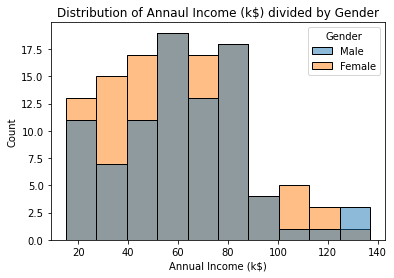

In [92]:
sns.histplot(x = customers["Annual Income (k$)"], hue = customers["Gender"])
plt.title("Distribution of Annaul Income (k$) divided by Gender")
plt.show()

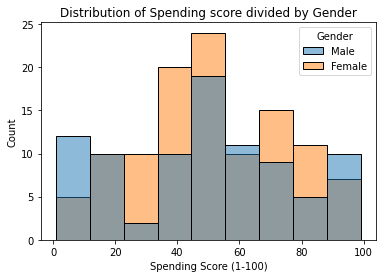

In [93]:
sns.histplot(x = customers["Spending Score (1-100)"], hue = customers["Gender"])
plt.title("Distribution of Spending score divided by Gender")
plt.show()

# Create the segments

In [102]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [103]:
# Not needed for the final modell, only for modell comparison (1st and 2nd)
# Adding a new column, where gender is numerical
# customers["Gender_numerical"] = customers["Gender"].factorize()[0]

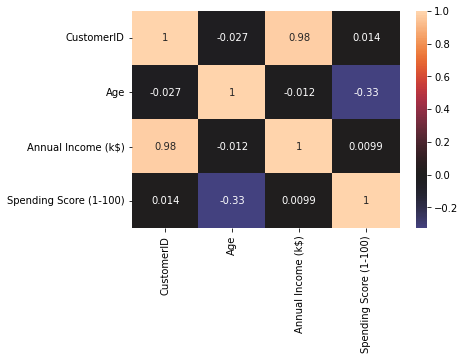

In [104]:
sns.heatmap(customers.corr(), center = 0, annot = True)
plt.show()

# There is no column, which has high correlation to other (highest is age negatively with spending score -0.33)
# CustomerID is most probably based on the creation of the database, but not relevant

## 1st modell: all numerical columns used as input

Silhouette score: 0.42, 10 clusters

In [18]:
X = customers[["Age","Annual Income (k$)","Spending Score (1-100)","Gender_numerical"]]

# Standardize the data:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

KMeans(n_clusters=3, random_state=42)

In [23]:
silhouette_list = []
for item in range(2,11):
    modelKM = KMeans(n_clusters=item)
    modelKM.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, modelKM.labels_))

print("The best option to create "+ str(silhouette_list.index(max(silhouette_list))+2) + \
      " clusters, where silhouette score is :" + str(max(silhouette_list)) + ".")

The best option to create 10 clusters, where silhouette score is :0.42011198117622145.


In [25]:
# To find 10 clusters
modelKM10 = KMeans(n_clusters=10, random_state = 42)
modelKM10.fit(X_scaled)

KMeans(n_clusters=10, random_state=42)

In [26]:
# customers["cluster_label"] = modelKM10.labels_

In [ ]:
print(modelKM10.cluster_centers_.shape)
print(modelKM10.cluster_centers_)
cluster_age = modelKM10.cluster_centers_[:,0]
cluster_income = modelKM10.cluster_centers_[:,1]

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10, 5))

# -- Clustered data -- #
sns.scatterplot(ax = axes[0],
                x = X_scaled[:,0],                # Same, since the column order is kept 
                y = X_scaled[:,1],                # Same, since the column order is kept
                hue = modelKM10.labels_)           # Actually the same but saved the step to save into a new column / variable

axes[0].set_xlabel("Age")
axes[0].set_ylabel("Annual income")
axes[0].set_title("10 clusters")                   # Adjusted

# -- Cluster centers -- #
sns.scatterplot(ax = axes[0],
                x = modelKM10.cluster_centers_[:,0],       # Actually the same but saved the step to save into a new column / variable
                y = modelKM10.cluster_centers_[:,1],       # Actually the same but saved the step to save into a new column / variable
                marker = "X",       # Change marker form to X
                size = modelKM10.cluster_centers_[:,0],    # Adjusted
                sizes = (400,200),  # Increase the size for the centers
                color="red",         # Black color
                legend = None)      # No legend for the centers

plt.show()

## 2nd modell: all numerical columns, except age

Silhouette score is 0.55, 10 clusters

In [32]:
X_wo_Age = customers[["Annual Income (k$)","Spending Score (1-100)","Gender_numerical"]]

# Standardize the data:
scaler = StandardScaler()
scaler.fit(X_wo_Age)
X_scaled_wo_Age = scaler.transform(X_wo_Age)

silhouette_list = []
for item in range(2,11):
    modelKM = KMeans(n_clusters=item)
    modelKM.fit(X_scaled_wo_Age)
    silhouette_list.append(silhouette_score(X_scaled_wo_Age, modelKM.labels_))

print("The best option to create "+ str(silhouette_list.index(max(silhouette_list))+2) + \
      " clusters, where silhouette score is :" + str(max(silhouette_list)) + ".")

The best option to create 10 clusters, where silhouette score is :0.5512366718660201.


## 3rd modell: all numerical columns, except gender


Silhouette score is 0.43, 6 clusters

In [34]:
X_wo_Gender = customers[["Age", "Annual Income (k$)","Spending Score (1-100)"]]

# Standardize the data:
scaler = StandardScaler()
scaler.fit(X_wo_Gender)
X_scaled_wo_Gender = scaler.transform(X_wo_Gender)

silhouette_list = []
for item in range(2,11):
    modelKM = KMeans(n_clusters=item)
    modelKM.fit(X_scaled_wo_Gender)
    silhouette_list.append(silhouette_score(X_scaled_wo_Gender, modelKM.labels_))

print("The best option to create "+ str(silhouette_list.index(max(silhouette_list))+2) + \
      " clusters, where silhouette score is :" + str(max(silhouette_list)) + ".")

The best option to create 6 clusters, where silhouette score is :0.4284167762892593.


## 4th modell: only income and spending score

Silhouette score is 0.55, 5 clusters

In [107]:
X_simple = customers[["Annual Income (k$)","Spending Score (1-100)"]]

# Standardize the data:
scaler = StandardScaler()
scaler.fit(X_simple)
X_scaled_simple = scaler.transform(X_simple)

silhouette_list = []
for item in range(2,11):
    modelKM = KMeans(n_clusters=item)
    modelKM.fit(X_scaled_simple)
    silhouette_list.append(silhouette_score(X_scaled_simple, modelKM.labels_))

print("The best option to create "+ str(silhouette_list.index(max(silhouette_list))+2) + \
      " clusters, where silhouette score is :" + str(max(silhouette_list)) + ".")

The best option to create 5 clusters, where silhouette score is :0.5546571631111091.


In [108]:
modelKM5 = KMeans(n_clusters=5, random_state = 42)
modelKM5.fit(X_scaled_simple)

KMeans(n_clusters=5, random_state=42)

In [109]:
customers["cluster_label"] = modelKM5.labels_

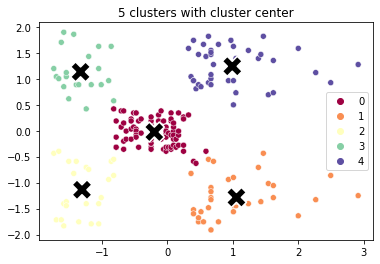

In [110]:
# -- Clustered data -- #
sns.scatterplot(x = X_scaled_simple[:,0],                # Same, since the column order is kept 
                y = X_scaled_simple[:,1],                # Same, since the column order is kept
                hue = modelKM5.labels_,           # Actually the same but saved the step to save into a new column / variable
                palette = sns.color_palette("Spectral", as_cmap=True))

plt.title("5 clusters with cluster center")                   # Adjusted

# -- Cluster centers -- #
sns.scatterplot(x = modelKM5.cluster_centers_[:,0],       # Actually the same but saved the step to save into a new column / variable
                y = modelKM5.cluster_centers_[:,1],       # Actually the same but saved the step to save into a new column / variable
                marker = "X",       # Change marker form to X
                size = modelKM5.cluster_centers_[:,0],    # Adjusted
                sizes = (400,400),  # Increase the size for the centers
                color="black",         # Black color
                legend = None)      # No legend for the centers

plt.show()

# Adjust the coloring here

**Conclusion**: creating for a small dataset (200 rows) more than 5 clusters is providing very small clusters, where the differences are difficult to measure and the potential market size seems to limited.
<br> **For further analysis we have chosen therefore the segmentation modell based on Annual Income and Spending Score**, where silhouette score is one of the highest and the groups are built based on the most relevant measures for our purposes.

# Explore the differences among the groups

In [111]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


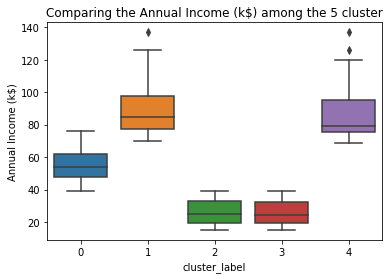

In [112]:
sns.boxplot(data = customers,
            x = customers["cluster_label"],
            y = customers["Annual Income (k$)"])
plt.title("Comparing the Annual Income (k$) among the 5 cluster")
plt.show()

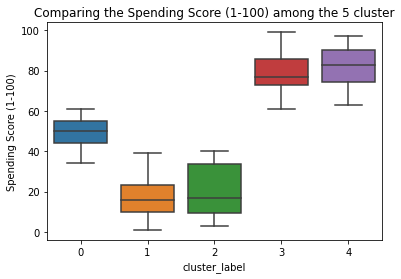

In [113]:
sns.boxplot(data = customers,
            x = customers["cluster_label"],
            y = customers["Spending Score (1-100)"])
plt.title("Comparing the Spending Score (1-100) among the 5 cluster")
plt.show()

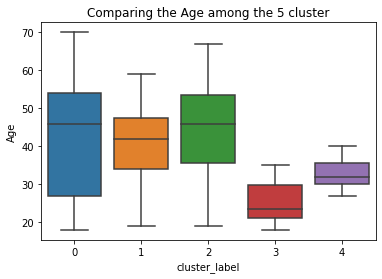

In [114]:
sns.boxplot(data = customers,
            x = customers["cluster_label"],
            y = customers["Age"])
plt.title("Comparing the Age among the 5 cluster")
plt.show()

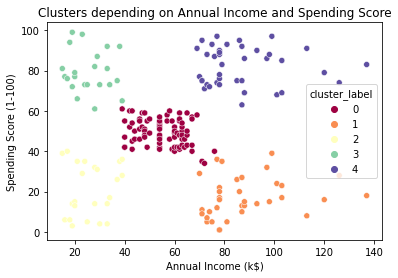

In [115]:
sns.scatterplot(data = customers,
                x = customers["Annual Income (k$)"],
                y = customers["Spending Score (1-100)"],
                hue = "cluster_label", 
                palette = sns.color_palette("Spectral", as_cmap=True))
plt.title("Clusters depending on Annual Income and Spending Score")
plt.show()

# Difference between this and modell visualization is that the x and y axes are not scaled, but mirroring actual data

In [69]:
customers["cluster_label"].value_counts(normalize= True)

0    0.405
4    0.195
1    0.175
2    0.115
3    0.110
Name: cluster_label, dtype: float64

In [72]:
# If we assume that spending score is a percentage from disposable income
# We can have a rough market estimation on the market size
customers["potential market"] = customers["Spending Score (1-100)"] * customers["Annual Income (k$)"] / 100

In [80]:
print(customers["potential market"].sum())
print(customers["potential market"][customers["cluster_label"] == 4].sum())
print(customers["potential market"][customers["cluster_label"] == 0].sum())

#Estimation 
(2769 + 2205 )/6093

6093.59
2769.55
2205.31


0.8163466272772033

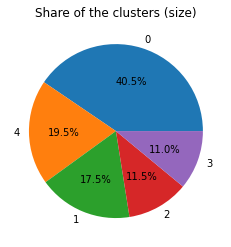

In [126]:
# create data

# Create a pieplot
plt.pie(customers["cluster_label"].value_counts(normalize= True), labels = [0,4,1,2,3], autopct='%1.1f%%')

# add a circle at the center to transform it in a donut chart
"""my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)"""

plt.title("Share of the clusters (size)")
plt.show()

# Select a group

Cluster 4 seems to be the most profitable segment, however they are "only" approx. 20 % of the market, in this case 39 potential customer.

If we are selecting also cluster 0, we can target additional 40 % of the population, while still targeting a cluster with higher income and higher spending score metrics. However this move strongly depends on our ressources and market strategy. 

# Further analysis after choosing our segment

In [82]:
customers[customers["cluster_label"] == 4].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster_label,potential market
count,39.000000,39.000000,39.000000,39.000000,39.0,39.000000
mean,162.000000,32.692308,86.538462,82.128205,4.0,71.014103
std,22.803509,3.728650,16.312485,9.364489,0.0,15.239602
min,124.000000,27.000000,69.000000,63.000000,4.0,51.120000
25%,143.000000,30.000000,75.500000,74.500000,4.0,60.000000
50%,162.000000,32.000000,79.000000,83.000000,4.0,68.640000
75%,181.000000,35.500000,95.000000,90.000000,4.0,80.870000
max,200.000000,40.000000,137.000000,97.000000,4.0,113.710000


In [85]:
customers[customers["cluster_label"] == 4].columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'cluster_label', 'potential market'],
      dtype='object')

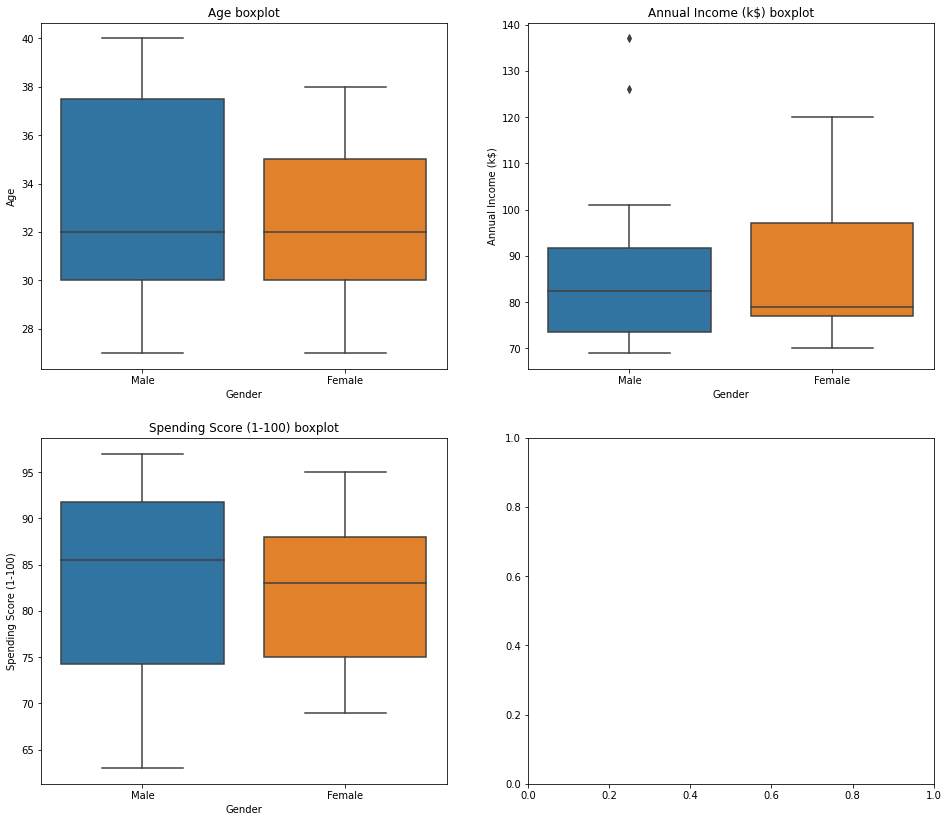

In [88]:
numCol = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
fig, axes = plt.subplots(2,2, figsize = (16, 14))

for col in customers[customers["cluster_label"] == 4].columns:
  if col in numCol:
    sns.boxplot(ax = axes[int(numCol.index(col)//2),int(numCol.index(col)%2)],
            data = customers[customers["cluster_label"] == 4],
            y = customers[customers["cluster_label"] == 4][col], 
            x = "Gender")
    axes[int(numCol.index(col)//2),int(numCol.index(col)%2)].set_title(col + " boxplot")
plt.show()